# Logistic Regression

Logistic regression is a popular statistical model used for binary classification problems. It aims to estimate the probability that an instance belongs to a particular class. The model assumes a linear relationship between the predictors and the log-odds of the event occurring. In this response, I'll explain the geometrical intuition behind logistic regression and provide the necessary formulas.

- **Assumption:** Classes are almost perfectly linerarly separable.

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2

# Create a toy multi-class dataset
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,   # give the clusters a little shake up
                            random_state = 42)

In [28]:
# Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = 42)

len(X_blob_train), len(X_blob_test), len(y_blob_train), len(y_blob_test)                                                  

(800, 200, 800, 200)

## Geometrical Intuition

In logistic regression, we can interpret the output as the probability of an instance belonging to a particular class. The decision boundary that separates the two classes is a hyperplane in the feature space. Since logistic regression is a binary classifier, this hyperplane divides the feature space into two regions—one for each class.

The decision boundary is determined by the weights (coefficients) assigned to the predictors. These weights control the orientation and tilt of the hyperplane. By adjusting the weights, logistic regression finds the best-fitting decision boundary that maximizes the likelihood of the observed data.

In logistic regression, we take $y=+1$ for positive points and $y=-1$ for negative points. Also $y=mx$ in higher dimension becomes $w^Tx+b=0$, where $w$ is normal drawn from the plane to the current point $x$ and $b$ is the intercept.

When plane passes through origin $b=0$ so the equatio becomes $w^Tx=0$

![Logistic Regression](./../../assets/Logistic_Regression.png)

From Figure,
$distance(S_i) = \frac{w^Tx}{||w||}$

If $||w||$ is a unit vector i.e. $||w||=1$

$S_i = w^Tx_i > 0$

$S_j = w^Tx_j < 0$

$y_i * w^Tx_i > 0$ means $w$ is correctly classifying the point while $y_i * w^Tx_i < 0$ means $w$ is misclassifying the point

- **Case I:** $y_i = +ve$ and $w^Tx_i = +ve$ then $y_i * w^Tx_i > 0$ i.e. $x_i$ is correctly classified
- **Case II:** $y_i = -ve$ and $w^Tx_i = -ve$ then $y_i * w^Tx_i > 0$ i.e. $x_i$ is correctly classified
- **Case III:** $y_i = +ve$ and $w^Tx_i = -ve$ then $y_i * w^Tx_i < 0$ i.e. $x_i$ is incorrectly classified
- **Case IV:** $y_i = -ve$ and $w^Tx_i = +ve$ then $y_i * w^Tx_i < 0$ i.e. $x_i$ is incorrectly classified

So the value of $w$ is chosen shuch that it gives the maximum number of points that are correctly classified points i.e. maximum value of $\sum{y_i*w^Tx_i}$. So we need to optimize the value of $w$ and the optimal value of the normal $w$ is given by;

\begin{equation}
w^* = argmax_w (\sum{y_i*w^Tx_i})
\end{equation}

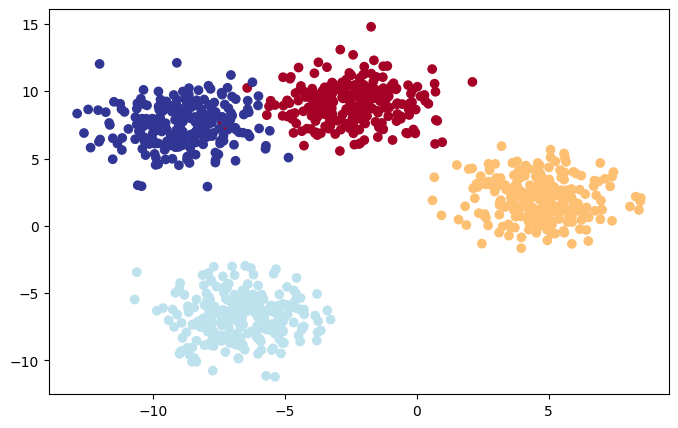

In [29]:
# Plot data
plt.figure(figsize=(8, 5))
plt.scatter(X_blob[:,0],
            X_blob[:,1],
            c = y_blob,
            cmap = plt.cm.RdYlBu);

## Sigmoid Function Squashing

In explanations above, we have seen, if $w$ be unit vector then, $y_iw^Tx_i$ is known as signed distance where distance = $w^Tx_i$. And our ultimite goal is to find the optimized summation of signed distance. However, the optimization shown above fails in some cases. Let's see a few examples where it fails.

`Example:` Consider we have 5 positive data points, 5 negative data points and an outlier in our dataset. Let's say each data point of the same class are also separated by a unit distance from its adjescent one as shown in the figure.

![Sigmoid Function Squashing](https://miro.medium.com/v2/resize:fit:1000/1*UdJaIJ7yD9ZziQVxPgMmtg.png)

**Case I:** Let's draw a decision surface $\pi_1$ as shown in the figure. All the positive and negative data points are unit distance away from the decision surface ($\pi_1$), while the outlier is 100 units of distance away. Then the optimization equation above gives:

$w = \sum{y_i*w^Tx_i} = (1+1+1+1+1) + (1+1+1+1+1) - 100 = -90$

**Case II:** In the same example, now let's draw a decision surface $\pi_2$. Let's say the outlier is unit distance away from $\pi_2$. Now this converges the above optimization equation to:

$w = \sum{y_i*w^Tx_i} = (1+2+3+4+5) + (-1-2-3-4-5) + 1 = +1$

In this example, $\pi_2$ maximizes the sum of signed distance mathematically but if we think logically $\pi_1$ is the correct hyperplane because all the points except a single negative point are correctly classified by $\pi_1$ while $\pi_2$ misclassifies 5 of the data points. So, maximizing sum of the signed distance is not prone to outliers. This is where sigmoid function squashing comes into play.

The idea beyound sigmoid function squashing is that as the magnitude of signed distance changes, supress the increament/decrement accordingly. The rate of supression changes according to the rate of increatement/decreament. There may be a number of functions for squashing requirements like ours, but we choose sigmoid function in particular because of following few reasons:

- It is very easy to differentiate.
- It has very nice probabilistic interpretation.

![Sigmoid Function](./../../assets/sigmoid.png)

*[[Source]](https://link.springer.com/chapter/10.1007/978-3-030-72280-7_7)*

The optimization function now becomes:

$w^* = argmax_w (\sum{\sigma(y_i*w^Tx_i)})$

where $\sigma = \frac{1}{1 + e^{-z_i}}$ and $z_i = y_i*w^Tx_i$

## Formulation of Objective Function

If $g(x) is a monotonic function then from the basic rule of statistics we know that;

$argmax_x f(x) = argmax_x g(f(x))$

$argmin_x f(x) = argmin_x g(f(x))$

$argmin_x f(x) = - argmax_x g(f(x))$

Since $log$ is a monotonic function, we can write above optimization function as:

$w^* = argmax_w (\sum{log(\sigma(y_i*w^Tx_i))}) = argmax_w (\sum{log(\frac{1}{1 + e^{-y_i*w^Tx_i}}))})$

$w^* = argmin_w (\sum{log(1 + e^{-y_i*w^Tx_i}}))$

Here, $y_i$ can have two unique values $y_i = +1$ or $y_i = -1$.

## Bias-Variance Tradeoff

Bias-Variance Tradeoff can be done in logistic regression model using a technique known as regularization that improves the generalization of the logistic regression model. Two commonly used regularization methods are Ridge regression and Lasso regression. Before studying these two solutions, let's understand the problem first.

The objective function of logistic regression is given by:

$w^* = argmin_w (\sum{log(1 + e^{-y_i*w^Tx_i}})) = argmin_w (\sum{log(1+ e^{-z_i})})$

We know the term, $e^{-z_i} \geq 0$

i.e. $log(1 + e^{-z_i}) = log(1 + +ve) \geq log(1) \geq 0$

So the minimum possible value of $log(1 + e^{-z_i}) = 0$

To make this term zero (in order to get minimum value):

$log(1 + e^{-z_i}) = log(1) = 0$

$1 + e^{-z_i} = 1$

$z_i = +∞$

So as $z_i = +∞$, $z_i$ is positive for all $i$, i.e. all the points are correctly classified i.e. even outliers are classified correctly, which is the case of overfitting. This term can further be broken into:

$z_i = +∞$ which give $w_i = +-∞$ because $y_i ≠ ∞$ and $x_i ≠ ∞$.

In [30]:
# Initialize Logistic Regression model and train
model = LogisticRegression()
model.fit(X_blob_train, y_blob_train)

LogisticRegression()

In [31]:
# Prediction result
y_pred_test = model.predict(X_blob_test)     # predicted value of y_test
y_pred_train = model.predict(X_blob_train)   # predicted value of y_train

In [32]:
# Plot decision boundary
h = .02
x_min, x_max = X_blob[:, 0].min() - 1, X_blob[:, 0].max() + 1
y_min, y_max = X_blob[:, 1].min() - 1, X_blob[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

In [33]:
def plot_decision_boundary(model, X, y):
    """Plots decision boundaries of model predicting on X in comparison to y."""
    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make predictions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Test for multi-class or binary
    if Z.ndim == 1:  # Binary labels
        Z = np.round(Z)
    else:  # Probabilities or scores for multiple classes
        Z = np.argmax(Z, axis=1)

    # Reshape preds and plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

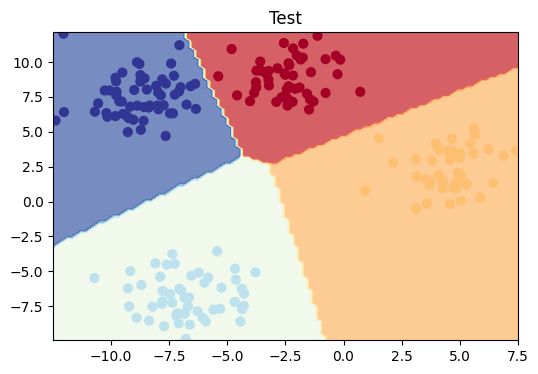

In [34]:
# Plotting decision boundary for blobs boundary region
plt.figure(figsize=(6, 4))
plt.title("Test")
plot_decision_boundary(model, X_blob_test, y_blob_test)
plt.show()

In [35]:
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error, 
    root_mean_squared_error,
)

mae = mean_absolute_error(y_blob_test, y_pred_test)
mse = mean_squared_error(y_blob_test, y_pred_test) 
rmse = root_mean_squared_error(y_blob_test, y_pred_test)

print("MAE:", round(mae, 4), "--- MSE:", round(mse, 4), "--- RMSE:", round(rmse, 4))

MAE: 0.0 --- MSE: 0.0 --- RMSE: 0.0


### Ridge Regression (L2 Regularization)

From the equation above, we got $w_i = ∞$. This issue can be solved using Ridge Regression.

Since `w` is normal to the decision surface, $w^Tw = 1$ 

$w^Tw = \sum w_j^2 = ||w||_2^2$ -> L2 norm.

Hence the name L2 Regularization.

Ridge Regression adds a penalty term ($\lambda$) to the objective function as shown below:

$w^* = argmin_w [\sum{log(1 + e^{-y_i*w^Tx_i}}) + \lambda*w^Tw]$

Now we cannot use $w_i = +-∞$ because this will make $w^Tw = ∞$ which in turns make the entire objective function $∞$ and not zero.

**Case I:** when $\lambda = 0 (i.e. small)$

This takes us to the previous stage, where we were overfitting.

**Case II:** when $\lambda = ∞ (i.e. very high)$

The entire term becomes ∞. So our training data won't matter and we get the same result irrespective of the nature of the data point. This $\lambda$ here is the hyperparameter for logistic regression.

### Lasso Regression (L1 Regularization)

Lasso Regression serves the same purpose as done by Ridge Regression. In addition it has an advantage of sparsity. Lasso Regression makes all the non-important features zero. In case of Ridge Regression, non-important become low but not necessarily zero.

$w^* = argmin_w [\sum{log(1 + e^{-y_i*w^Tx_i}}) + \lambda*||w||_1]$

where $||w||_1$ is the L1-Norm. Hence the name L1-Regularization.

### Elastic Net

Sometimes people use both L1 and L2 regularization simultaneously and this is known as elastic net. In such case we encounter two hyperparameters ($\lambda_1$ and $\lambda_2$). The objective function then becomes:

$w^* = argmin_w [\sum{log(1 + e^{-y_i*w^Tx_i}}) + \lambda_1*||w||_1 + \lambda_2*||w||_2^2]$

## References

- [Logistic Regression](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/logistic-regression/)
- [Video on Logistic Regression](https://www.youtube.com/watch?v=TPqr8t919YM)
- [Video on Logistic Regression and Squashing](https://www.youtube.com/watch?v=qL82QTDV8Go)